# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds =city_weather["clouds"]["all"]
        city_humidity = city_weather["main"]["humidity"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | agirish
Processing Record 6 of Set 1 | thinadhoo
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | keti bandar
Processing Record 10 of Set 1 | azuaga
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | bagalkot
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | belovo
Processing Record 19 of Set 1 | plettenberg bay
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | lucapa
Processing Record 22

Processing Record 36 of Set 4 | provideniya
Processing Record 37 of Set 4 | morehead
Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | guicheng
City not found. Skipping...
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | ijaki
City not found. Skipping...
Processing Record 42 of Set 4 | beloha
Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | lichtenburg
Processing Record 45 of Set 4 | eldorado
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | liuhe
Processing Record 48 of Set 4 | marzuq
Processing Record 49 of Set 4 | namuac
Processing Record 0 of Set 5 | meulaboh
Processing Record 1 of Set 5 | arrifes
Processing Record 2 of Set 5 | hwange
Processing Record 3 of Set 5 | yagodnoye
Processing Record 4 of Set 5 | mareeba
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | grand-santi
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | trudarmey

Processing Record 25 of Set 8 | biak
Processing Record 26 of Set 8 | ashnak
Processing Record 27 of Set 8 | shangrao
Processing Record 28 of Set 8 | camacha
Processing Record 29 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 30 of Set 8 | ennis
Processing Record 31 of Set 8 | lambarene
Processing Record 32 of Set 8 | nagato
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | oia
Processing Record 35 of Set 8 | bay roberts
Processing Record 36 of Set 8 | bubaque
Processing Record 37 of Set 8 | muisne
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | mazatlan
Processing Record 41 of Set 8 | isangel
Processing Record 42 of Set 8 | ryotsu
Processing Record 43 of Set 8 | celestun
Processing Record 44 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 45 of Set 8 | moerai
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | kunming
Proce

Processing Record 14 of Set 12 | tombouctou
Processing Record 15 of Set 12 | goreloye
Processing Record 16 of Set 12 | southbridge
Processing Record 17 of Set 12 | coahuayana
Processing Record 18 of Set 12 | camapua
Processing Record 19 of Set 12 | tempoal
City not found. Skipping...
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | rungata
City not found. Skipping...
Processing Record 22 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 23 of Set 12 | beyla
Processing Record 24 of Set 12 | dali
Processing Record 25 of Set 12 | usinsk
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | eydhafushi
Processing Record 28 of Set 12 | darhan
Processing Record 29 of Set 12 | palmer
Processing Record 30 of Set 12 | didwana
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | santa fe
Processing Record 33 of Set 12 | carutapera
Processing Record 34 of Set 12 | pula
Processing Record 35 of Set 12 | r

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame( city_data, columns=("City","Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed", "Country", "Date"))

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.56,75,7,8.12,PF,[dt]
1,kruisfontein,-34.0033,24.7314,21.05,92,19,2.78,ZA,[dt]
2,mataura,-46.1927,168.8643,18.04,46,25,1.42,NZ,[dt]
3,lorengau,-2.0226,147.2712,26.05,85,100,2.84,PG,[dt]
4,agirish,61.9247,63.0231,-9.24,92,100,3.78,RU,[dt]


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.56,75,7,8.12,PF,['dt']
1,kruisfontein,-34.0033,24.7314,21.05,92,19,2.78,ZA,['dt']
2,mataura,-46.1927,168.8643,18.04,46,25,1.42,NZ,['dt']
3,lorengau,-2.0226,147.2712,26.05,85,100,2.84,PG,['dt']
4,agirish,61.9247,63.0231,-9.24,92,100,3.78,RU,['dt']


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

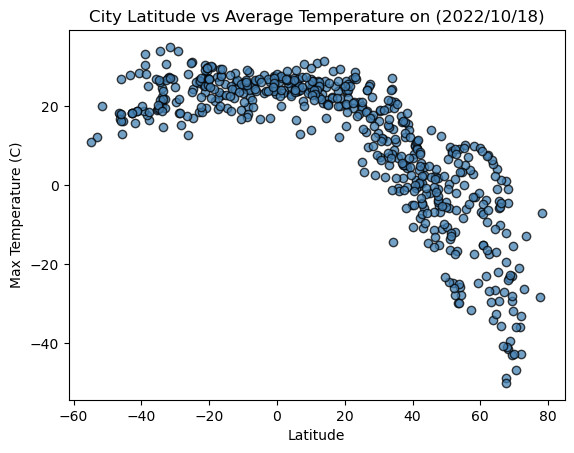

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Average Temperature on (2022/10/18)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

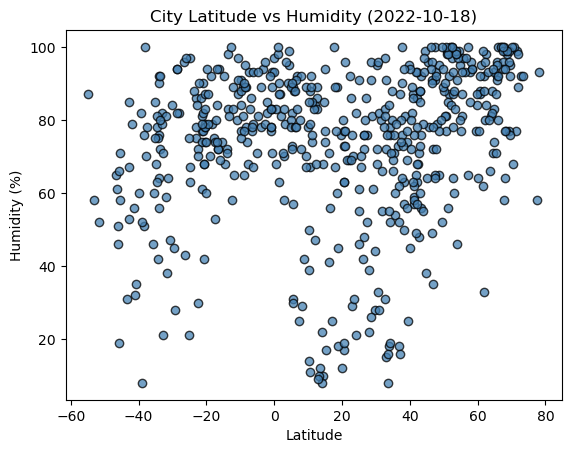

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

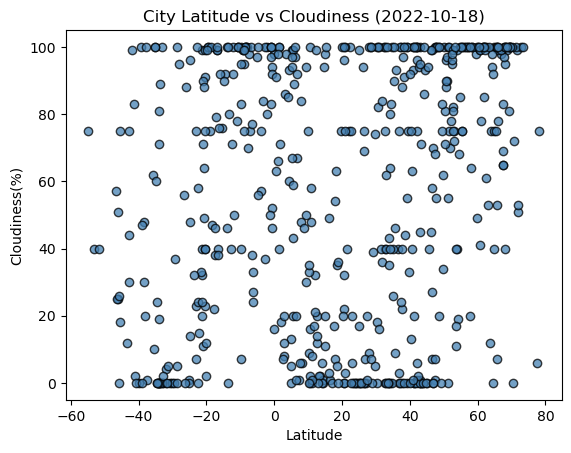

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

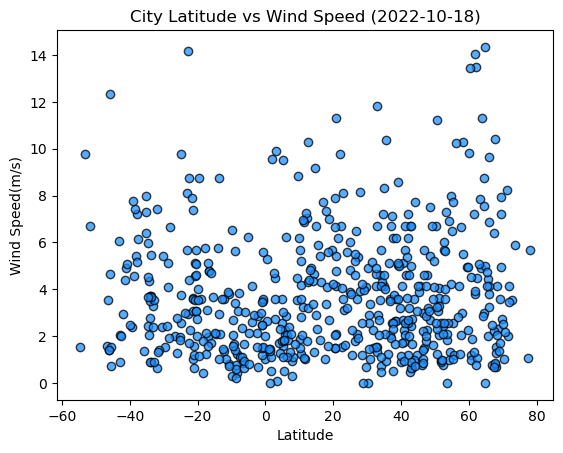

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="dodgerblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,agirish,61.9247,63.0231,-9.24,92,100,3.78,RU,['dt']
5,thinadhoo,0.5333,72.9333,27.32,68,63,5.28,MV,['dt']
8,keti bandar,24.1447,67.4497,21.03,82,0,5.59,PK,['dt']
9,azuaga,38.2667,-5.6833,4.42,63,91,2.66,ES,['dt']
11,bagalkot,16.1833,75.7000,22.41,41,49,1.84,IN,['dt']


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

#rthern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

#southern_hemi_df=city_data_df[city_data_df["Lat"]<0] 

# Display sample data southern_hemi_df.head()
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.56,75,7,8.12,PF,['dt']
1,kruisfontein,-34.0033,24.7314,21.05,92,19,2.78,ZA,['dt']
2,mataura,-46.1927,168.8643,18.04,46,25,1.42,NZ,['dt']
3,lorengau,-2.0226,147.2712,26.05,85,100,2.84,PG,['dt']
6,east london,-33.0153,27.9116,21.79,82,100,3.27,ZA,['dt']


In [95]:
# Define a function to create Linear Regression plots
def lin_reg_plt():
    (slope, intercept, r_squared, pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq_coor=(xc, yc)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color='steelblue', edgecolor="black")
    plt.plot(x_values,regress_values, color='r', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    
    print(f" The r value is: {r_squared}")
   




 The r value is: -0.8442963148599197


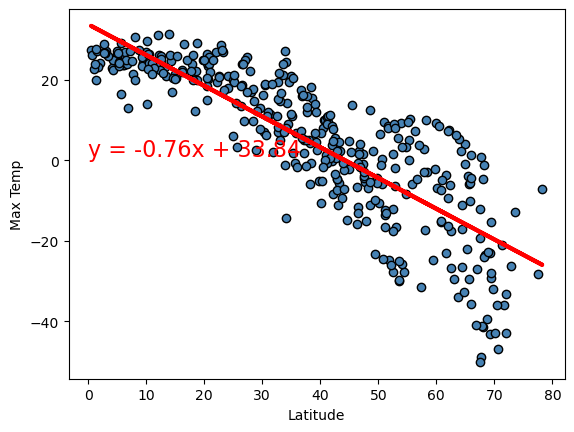

In [99]:
#def 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

xc=0
yc=1

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# To close pyplot
plt.close()


###  Temperature vs. Latitude Linear Regression Plot

 The r value is: -0.8442963148599197


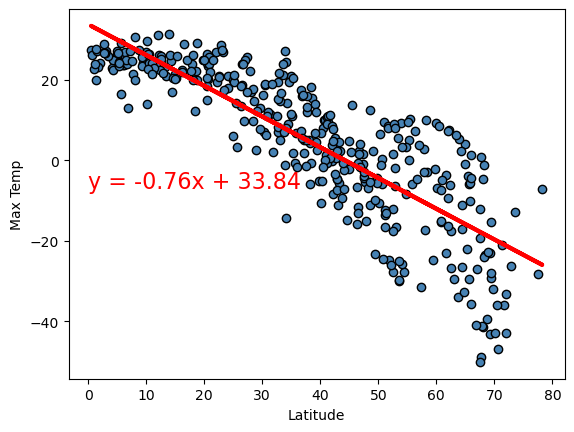

In [108]:
# Define a function to create Linear Regression plots
def lin_reg_plt():
    (slope, intercept, r_squared, pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq_coor=(xc, yc)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color='steelblue', edgecolor="black")
    plt.plot(x_values,regress_values, color='r', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    
    print(f" The r value is: {r_squared}")
   
#
#Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

xc=0
yc=-7

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.31782036902844274


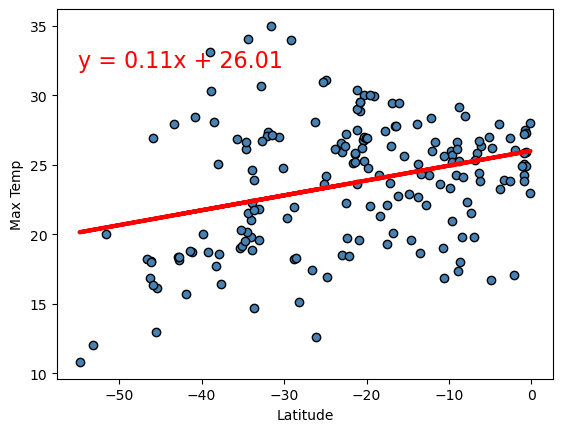

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

xc=-55
yc=32

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The final linear regression and scatter plot map of maximum temprature and latitude shows temperature decreases progressively from equator towards the north poles. In the southern hemispher the graph shows temprature increases progressively from southern pole towards equator. Thus the realtionship between the two variables in the southern hemispher is a weak positive relationship while there is strong negative relashinship in the northen hemispher.


### Humidity vs. Latitude Linear Regression Plot

 The r value is: 0.32901951030907634


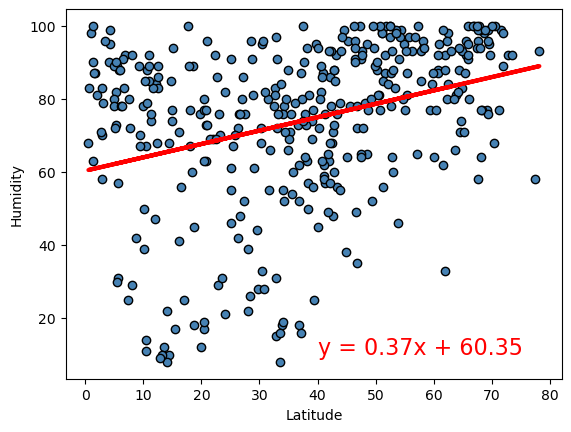

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

xc=40
yc=10

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.47057509143986725


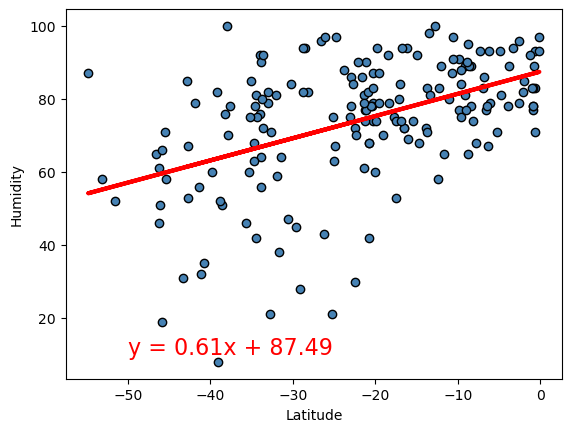

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

xc=-50
yc=10

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The the realtionship between the two variables of latitude and humidity in both southern and northern hemispher is weak relationship. Thus there is no defined pattern between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

 The r value is: 0.3469806885145401


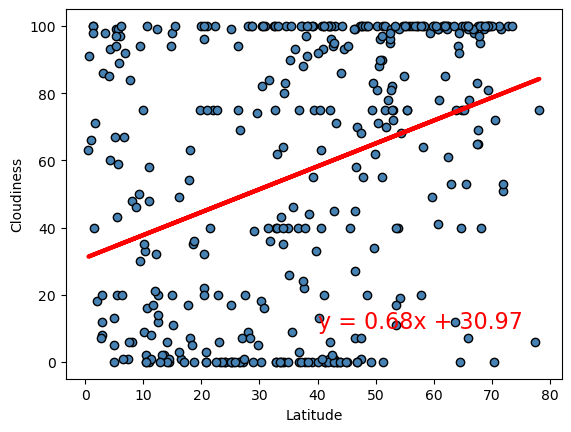

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

xc=40
yc=10

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.4415499944181641


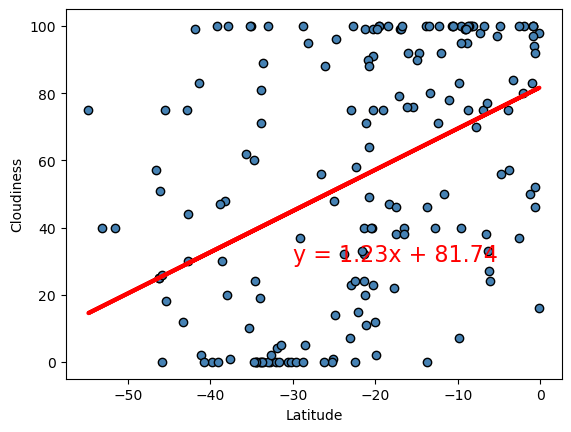

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

xc=-30
yc=30

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The the realtionship between the two variables of latitude and cloudness in both southern and northern hemispher is weak positive relationship. Thus there is no defined pattern between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

 The r value is: 0.07891323060535753


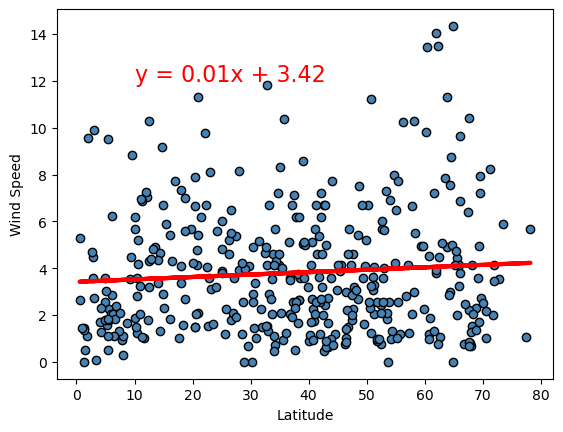

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

xc=10
yc=12

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.show()

# To close pyplot
plt.close()

 The r value is: -0.2731047225946709


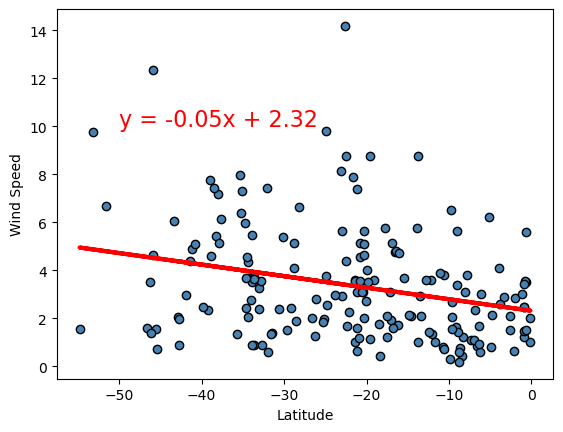

In [117]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

xc=-50
yc=10

lin_reg_plt()
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.show()

# To close pyplot
plt.close()

The the realtionship between the two variables of latitude and wind speed in both southern and northern hemispher is a very weak relationship while it is positive in the sen in northen hemispher. Thus there is no defined pattern between th two variables.